In [2]:
import requests
import os
from dotenv import find_dotenv, load_dotenv

dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
WEATHER_KEY = os.getenv("WEATHER_KEY")

url = "http://api.weatherapi.com/v1/forecast.json"

params = {
    'key': WEATHER_KEY,
    'days': 1,
    'q': 'Auckland',
    'aqi': 'no',
    'alerts': 'no'
}

In [3]:
response = requests.get(url, params = params)
data = response.json()

# Extracting relevant data
temp_c = data["current"]["temp_c"]
wind_kph = data["current"]["wind_kph"]
humidity = data["current"]["humidity"]
feelslike_c = data["current"]["feelslike_c"]
condition = data["current"]["condition"]["text"]
icon_url = "https:" + data["current"]["condition"]["icon"]

forecast_date = data["forecast"]["forecastday"][0]["date"]
hours_data = data["forecast"]["forecastday"][0]["hour"]

In [12]:
from datetime import datetime, timedelta

start_time = datetime.strptime(f"{data['forecast']['forecastday'][0]['date']} 08:00", "%Y-%m-%d %H:%M")
end_time = datetime.strptime(f"{data['forecast']['forecastday'][0]['date']} 22:00", "%Y-%m-%d %H:%M")
print(start_time, end_time)

2024-10-29 08:00:00 2024-10-29 22:00:00


In [13]:
forecast_12h = [
    {
        "time": hour["time"],
        "temp_c": hour["temp_c"],
        "precip_mm": hour["precip_mm"],
        "chance_of_rain": hour["chance_of_rain"]
    }
    for hour in hours_data
    if start_time <= datetime.strptime(hour["time"], "%Y-%m-%d %H:%M") < end_time
]
forecast_12h

[{'time': '2024-10-29 08:00',
  'temp_c': 15.3,
  'precip_mm': 0.07,
  'chance_of_rain': 100},
 {'time': '2024-10-29 09:00',
  'temp_c': 16.2,
  'precip_mm': 0.05,
  'chance_of_rain': 100},
 {'time': '2024-10-29 10:00',
  'temp_c': 17.0,
  'precip_mm': 0.02,
  'chance_of_rain': 71},
 {'time': '2024-10-29 11:00',
  'temp_c': 18.2,
  'precip_mm': 0.0,
  'chance_of_rain': 0},
 {'time': '2024-10-29 12:00',
  'temp_c': 18.6,
  'precip_mm': 0.0,
  'chance_of_rain': 0},
 {'time': '2024-10-29 13:00',
  'temp_c': 19.1,
  'precip_mm': 0.0,
  'chance_of_rain': 0},
 {'time': '2024-10-29 14:00',
  'temp_c': 19.5,
  'precip_mm': 0.22,
  'chance_of_rain': 100},
 {'time': '2024-10-29 15:00',
  'temp_c': 19.5,
  'precip_mm': 0.04,
  'chance_of_rain': 71},
 {'time': '2024-10-29 16:00',
  'temp_c': 18.9,
  'precip_mm': 0.02,
  'chance_of_rain': 80},
 {'time': '2024-10-29 17:00',
  'temp_c': 17.5,
  'precip_mm': 0.06,
  'chance_of_rain': 100},
 {'time': '2024-10-29 18:00',
  'temp_c': 16.1,
  'precip_mm':

In [17]:
times = [entry["time"].split(" ")[1] for entry in forecast_12h]
temperatures = [entry["temp_c"] for entry in forecast_12h]
precipitations = [entry["precip_mm"] for entry in forecast_12h]

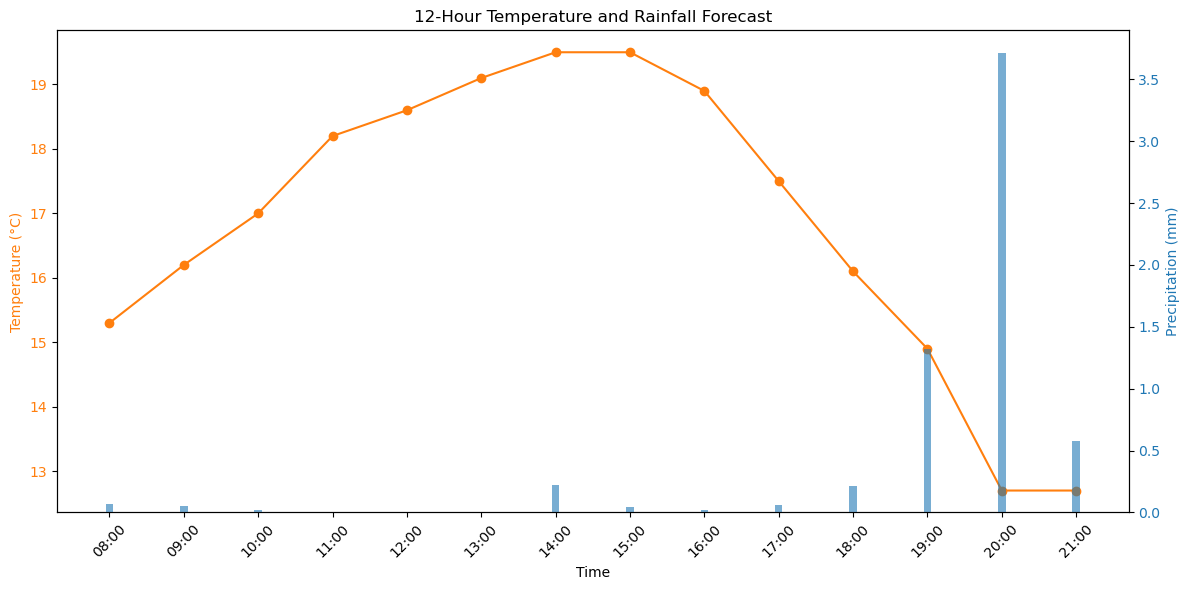

In [21]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on the primary y-axis
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color='tab:orange')
ax1.plot(times, temperatures, color='tab:orange', label='Temperature (°C)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# Create a second y-axis for the precipitation
ax2 = ax1.twinx()
ax2.set_ylabel("Precipitation (mm)", color='tab:blue')
ax2.bar(times, precipitations, color='tab:blue', alpha=0.6, label='Precipitation (mm)', width=0.1)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Formatting the x-axis for better readability
ax1.set_xticks(times)
ax1.set_xticklabels(times, rotation=45)

# Add a title and legend
plt.title("12-Hour Temperature and Rainfall Forecast")
fig.tight_layout()
plt.show()